# HW09: KNN, SVMs, and Random Forest for handwriting recognition



**Chaithra K C**

1. Introduction
2. Data preparation
    1. Load data
    2. Check for null and missing values
    3. Split training and valdiation set
3. K Nearest Neighbor Classifier
    1. Define the model
    2. Choosing the K-Value
    3. Evaluate the model
4. Support Vector Classifier
    1. SVC with Linear Kernel
    2. Choosing the best kernel - Polynomial kernel, Sigmoid Kernel, RBF Kernel
    3. Hyperparameter tuning - tuning regularization parameter C (cost for
misclassification)
    4. Evaluate the model
5. Random Forest Classifier
    1. Defind the model
    2. Hyperparameter tuning - number of trees 
    3. Evaluate the model
6. Gradient Boosting Classifier
    1. Define the model

7. Prediction and submition to Kaggle
    1. Predict and Submit results

#### 1. INTRODUCTION

The data set comes from the Kaggle Digit Recognizer competition. The goal is to recognize digits 0 to 9 in handwriting images.
We construct prediction models using naïve Bayes and decision tree algorithms. Tune their parameters to get the best model (measured by cross validation) and compare which algorithms provide better model for this task.



#### 2. DATA PREPARATION

In [42]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

#### 2.1 LOAD DATA

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((42000, 785), (28000, 784))

In [6]:
train.head() # vieweing first 5 rows to understand the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.2 CHECK FOR NULL OR NAN VALUES

In [8]:
#sns.heatmap(train.isnull()) # no null or NA values in training data # plotting takes time

In [9]:
#sns.heatmap(test.isnull()) # no null or NA values in testing data # plotting takes time

There are no Null or NA values present in the dataset of both train and test.

#### 2.3 SPLIT TRAINING AND VALIDATION SET

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

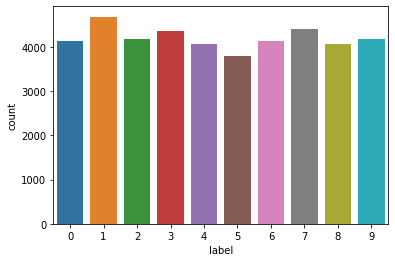

In [10]:
Y_train = train["label"]

# dropping the 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)

Y_train.value_counts()

We have similar counts for the 10 digits.

In [11]:
Y_train[0]

1

**We can get a better sense for one of these examples by visualising the image and looking at the label**

1


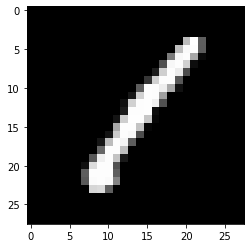

In [12]:
# visualizing the digits for few training example
print(Y_train[0])
training_example = X_train.iloc[0]
training_example = training_example.to_numpy() # converting series to numpy array
training_example = training_example.reshape((28,28)) # converting 1d array of pixels to 2d (28X28) pixels matrix
plt.imshow(training_example, cmap='gray')

8


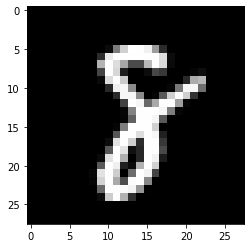

In [13]:
print(Y_train[300])
training_example = X_train.iloc[300]
training_example = training_example.to_numpy() # converting series to numpy array
training_example = training_example.reshape((28,28)) # converting 1d array of pixels to 2d (28X28) pixels matrix
plt.imshow(training_example, cmap='gray')

A small fraction (40%) became the validation set which the model is evaluated and the rest (60%) is used to train the model

In [14]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.4, random_state=30)

# K Nearest Neighbor

In [15]:
from sklearn.neighbors import KNeighborsClassifier


In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
knn_pred = knn.predict(X_val)

In [18]:
# Look at confusion matrix 
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

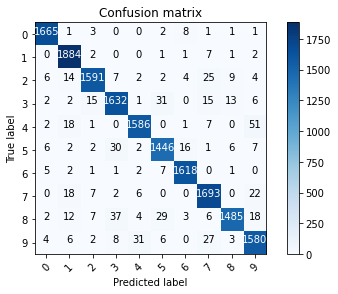

In [19]:
# compute the confusion matrix
confusion_knn = confusion_matrix(Y_val, knn_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_knn, classes = range(10)) 

In [20]:
print(classification_report(Y_val,knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1682
           1       0.96      0.99      0.98      1898
           2       0.98      0.96      0.97      1664
           3       0.95      0.95      0.95      1717
           4       0.97      0.95      0.96      1666
           5       0.95      0.95      0.95      1518
           6       0.98      0.99      0.98      1637
           7       0.95      0.97      0.96      1748
           8       0.98      0.93      0.95      1603
           9       0.93      0.95      0.94      1667

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



3.2 Choosing the K-Value

Using elbow method to pick a good K Value:

In [27]:
error_rate = []

# Will take some time. Finding optimal K value between 1 - 15
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != Y_val)) # error rate

Text(0, 0.5, 'Error Rate')

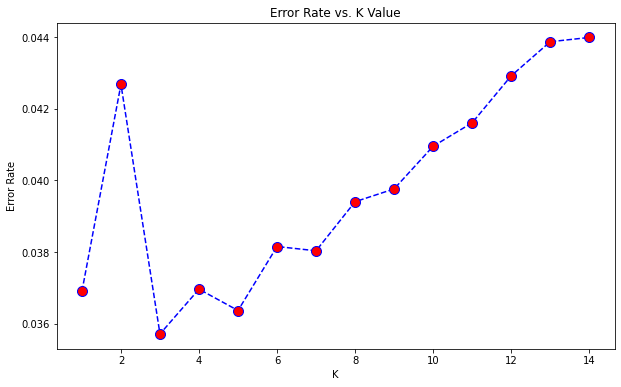

In [40]:
# plotting the error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that for K=3 has the lowest error rate of ~0.0350. We can retrain the model with that and check the classification report!

WITH K=3




              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1682
           1       0.95      0.99      0.97      1898
           2       0.98      0.95      0.96      1664
           3       0.95      0.96      0.96      1717
           4       0.97      0.95      0.96      1666
           5       0.96      0.95      0.96      1518
           6       0.98      0.99      0.99      1637
           7       0.96      0.97      0.96      1748
           8       0.98      0.91      0.95      1603
           9       0.94      0.95      0.95      1667

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



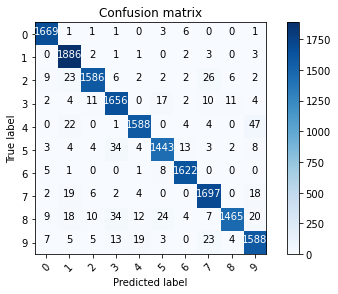

In [41]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_val)

print('WITH K=3')
print('\n')
# compute the confusion matrix
confusion_knn = confusion_matrix(Y_val, knn_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_knn, classes = range(10)) 
print('\n')
print(classification_report(Y_val,knn_pred))

# Support Vector Classifier


In [22]:
from sklearn.svm import SVC

In [23]:
svc_linear_clf = SVC(kernel='linear')
svc_linear_clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [24]:
svc_linear_pred = svc_linear_clf.predict(X_val)

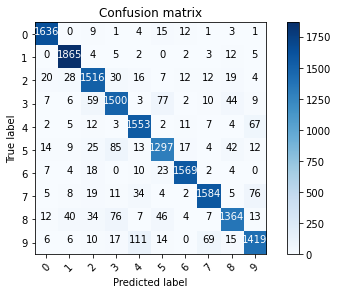

In [25]:
# compute the confusion matrix
confusion_svc_linear = confusion_matrix(Y_val, svc_linear_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_svc_linear, classes = range(10)) 

In [26]:
print(classification_report(Y_val,svc_linear_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1682
           1       0.95      0.98      0.96      1898
           2       0.89      0.91      0.90      1664
           3       0.87      0.87      0.87      1717
           4       0.89      0.93      0.91      1666
           5       0.87      0.85      0.86      1518
           6       0.96      0.96      0.96      1637
           7       0.93      0.91      0.92      1748
           8       0.90      0.85      0.88      1603
           9       0.88      0.85      0.87      1667

    accuracy                           0.91     16800
   macro avg       0.91      0.91      0.91     16800
weighted avg       0.91      0.91      0.91     16800



# Hyperparameter Tuning to choose SVM Kernel

### Polynomial Kernel
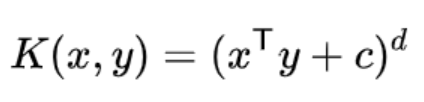

In [28]:
svc_polynomial_clf = SVC(kernel='poly')
svc_polynomial_clf.fit(X_train, Y_train)

SVC(kernel='poly')

In [29]:
svc_poly_pred = svc_polynomial_clf.predict(X_val)

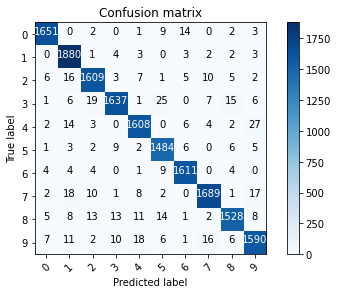

In [30]:
# compute the confusion matrix
confusion_svc_poly = confusion_matrix(Y_val, svc_poly_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_svc_poly, classes = range(10)) 

In [31]:
print(classification_report(Y_val,svc_poly_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1682
           1       0.96      0.99      0.97      1898
           2       0.97      0.97      0.97      1664
           3       0.98      0.95      0.96      1717
           4       0.97      0.97      0.97      1666
           5       0.96      0.98      0.97      1518
           6       0.98      0.98      0.98      1637
           7       0.98      0.97      0.97      1748
           8       0.97      0.95      0.96      1603
           9       0.96      0.95      0.96      1667

    accuracy                           0.97     16800
   macro avg       0.97      0.97      0.97     16800
weighted avg       0.97      0.97      0.97     16800



### Radial basis function kernel

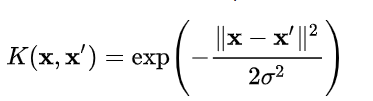

In [32]:
svc_rbf_clf = SVC(kernel='rbf')
svc_rbf_clf.fit(X_train, Y_train)

SVC()

In [33]:
svc_rbf_pred = svc_rbf_clf.predict(X_val)

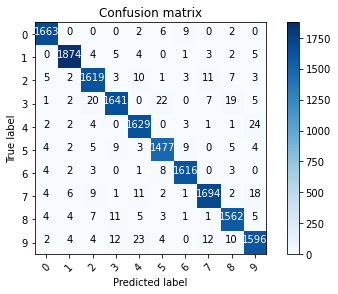

In [34]:
# compute the confusion matrix
confusion_svc_rbf = confusion_matrix(Y_val, svc_rbf_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_svc_rbf, classes = range(10)) 

In [35]:
print(classification_report(Y_val,svc_rbf_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1682
           1       0.99      0.99      0.99      1898
           2       0.97      0.97      0.97      1664
           3       0.98      0.96      0.97      1717
           4       0.97      0.98      0.97      1666
           5       0.97      0.97      0.97      1518
           6       0.98      0.99      0.99      1637
           7       0.98      0.97      0.97      1748
           8       0.97      0.97      0.97      1603
           9       0.96      0.96      0.96      1667

    accuracy                           0.97     16800
   macro avg       0.97      0.97      0.97     16800
weighted avg       0.97      0.97      0.97     16800



### Sigmoid Kernel

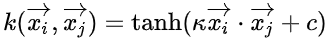

In [36]:
svc_sigmoid_clf = SVC(kernel='sigmoid')
svc_sigmoid_clf.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [37]:
svc_sigmoid_pred = svc_sigmoid_clf.predict(X_val)

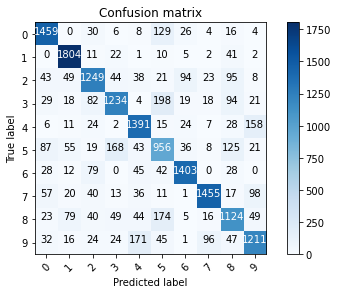

In [38]:
# compute the confusion matrix
confusion_svc_sigmoid = confusion_matrix(Y_val, svc_sigmoid_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_svc_sigmoid, classes = range(10)) 

In [39]:
print(classification_report(Y_val,svc_sigmoid_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1682
           1       0.87      0.95      0.91      1898
           2       0.78      0.75      0.77      1664
           3       0.79      0.72      0.75      1717
           4       0.78      0.83      0.81      1666
           5       0.60      0.63      0.61      1518
           6       0.87      0.86      0.86      1637
           7       0.89      0.83      0.86      1748
           8       0.70      0.70      0.70      1603
           9       0.77      0.73      0.75      1667

    accuracy                           0.79     16800
   macro avg       0.79      0.79      0.79     16800
weighted avg       0.79      0.79      0.79     16800



RBF and Polynomial Kernels has the best accuracy (0.97). Choosing RBF kernel for the final SVC

### Hyperparameter tuning - tuning regularization parameter C (cost for misclassification)

In [44]:
c = [0.1, 0.3, 0.5, 0.8, 1]
acc_score = []
for param in c:
  svc_clf = SVC(kernel='rbf', C=param)
  svc_clf.fit(X_train, Y_train)
  svc_pred = svc_clf.predict(X_val)
  acc_score.append(accuracy_score(Y_val, svc_pred))

Text(0, 0.5, 'Accuracy Score')

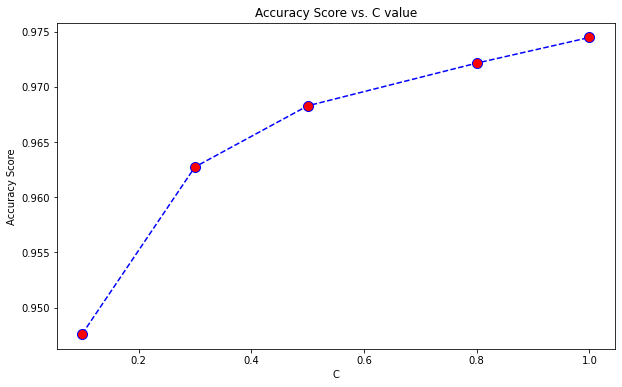

In [45]:
# plotting the accuracy score

plt.figure(figsize=(10,6))
plt.plot(c,acc_score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. C value')
plt.xlabel('C')
plt.ylabel('Accuracy Score')

In [46]:
# choosing C = 1 for the final SVC model based on the plot above

svc_clf = SVC(kernel='rbf', C=1)
svc_clf.fit(X_train, Y_train)
svc_pred = svc_clf.predict(X_val)

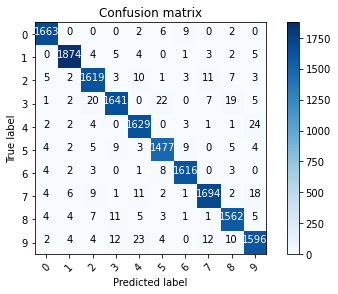

In [47]:
# compute the confusion matrix
confusion_svc = confusion_matrix(Y_val, svc_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_svc, classes = range(10)) 

In [48]:
print(classification_report(Y_val,svc_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1682
           1       0.99      0.99      0.99      1898
           2       0.97      0.97      0.97      1664
           3       0.98      0.96      0.97      1717
           4       0.97      0.98      0.97      1666
           5       0.97      0.97      0.97      1518
           6       0.98      0.99      0.99      1637
           7       0.98      0.97      0.97      1748
           8       0.97      0.97      0.97      1603
           9       0.96      0.96      0.96      1667

    accuracy                           0.97     16800
   macro avg       0.97      0.97      0.97     16800
weighted avg       0.97      0.97      0.97     16800



# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rand_forest_clf = RandomForestClassifier(criterion='gini', n_estimators=10) # gini criteria to measure the purity of the split
# default 10 random trees
rand_forest_clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [52]:
rand_forest_clf.score(X_val,Y_val)

0.935

Hyperparameter tuning - number of trees {5, 10, 25, 50, 100}

In [57]:
num_trees = [5,10,25,50,100,200,300,400,500]
acc_rf_score = []
for n in num_trees:
  rand_forest_clf = RandomForestClassifier(criterion='gini', n_estimators=n)
  rand_forest_clf.fit(X_train, Y_train)
  acc_rf_score.append(rand_forest_clf.score(X_val,Y_val))

Text(0, 0.5, 'Accuracy Score')

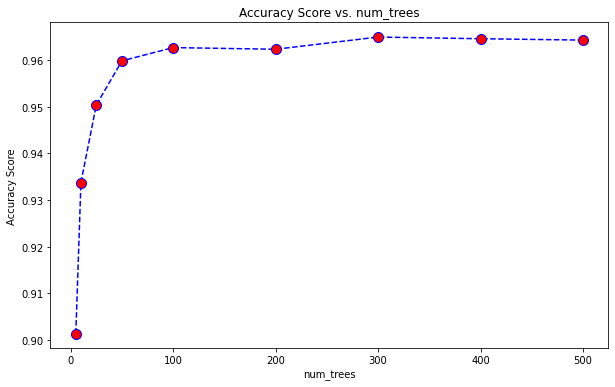

In [58]:
# plotting the accuracy score

plt.figure(figsize=(10,6))
plt.plot(num_trees,acc_rf_score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. num_trees')
plt.xlabel('num_trees')
plt.ylabel('Accuracy Score')

We are choosing num of trees for the model to be 100. We could have chosed 300,400, or 500 that has shown higher accuracy but there are chances of overfitting

In [59]:
  rand_forest_clf = RandomForestClassifier(criterion='gini', n_estimators=100)
  rand_forest_clf.fit(X_train, Y_train)


RandomForestClassifier()

In [60]:
rand_forest_pred = rand_forest_clf.predict(X_val)

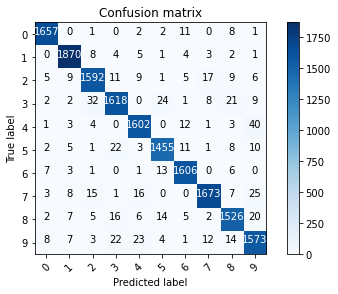

In [61]:
# compute the confusion matrix
confusion_rf = confusion_matrix(Y_val, rand_forest_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_rf, classes = range(10)) 

In [62]:
print(classification_report(Y_val,rand_forest_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1682
           1       0.98      0.99      0.98      1898
           2       0.96      0.96      0.96      1664
           3       0.96      0.94      0.95      1717
           4       0.96      0.96      0.96      1666
           5       0.96      0.96      0.96      1518
           6       0.97      0.98      0.98      1637
           7       0.97      0.96      0.97      1748
           8       0.95      0.95      0.95      1603
           9       0.93      0.94      0.94      1667

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800

